In [3]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder, TargetEncoder


   Unnamed: 0  PassengerId  Survived Pclass  \
0           0            1         0  third   
1           1            2         1  first   
2           2            3         1  third   
3           3            4         1  first   
4           4            5         0  third   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123 

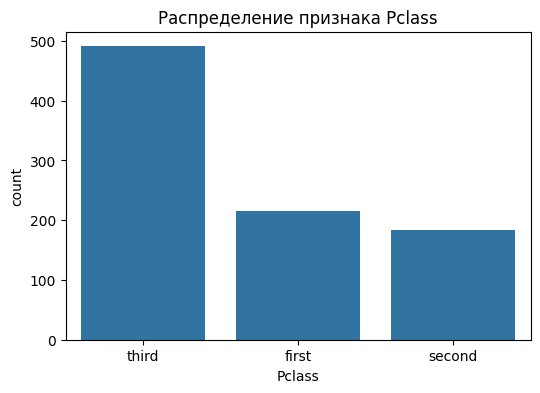

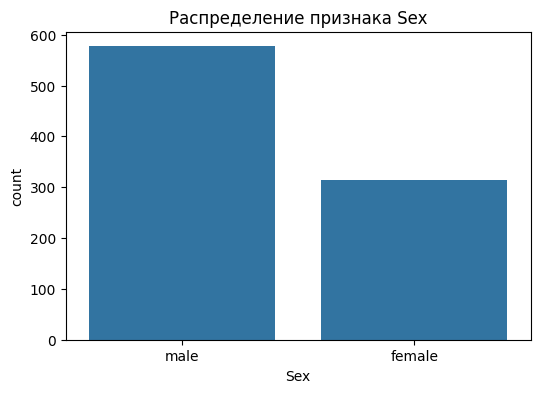

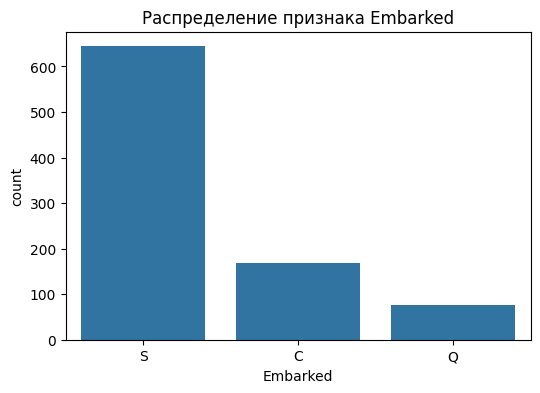

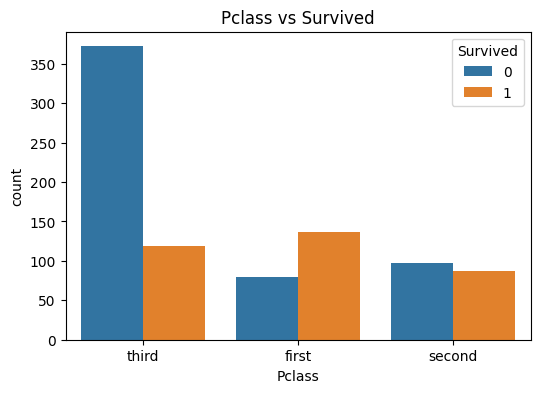

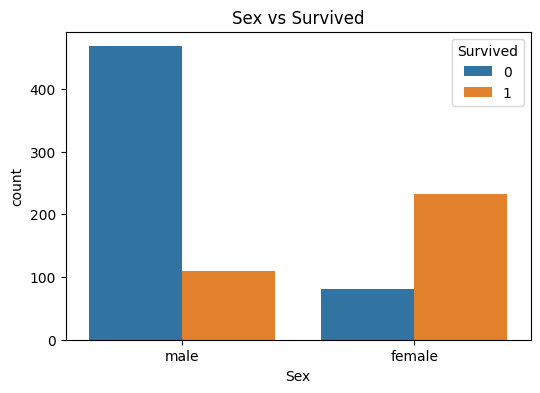

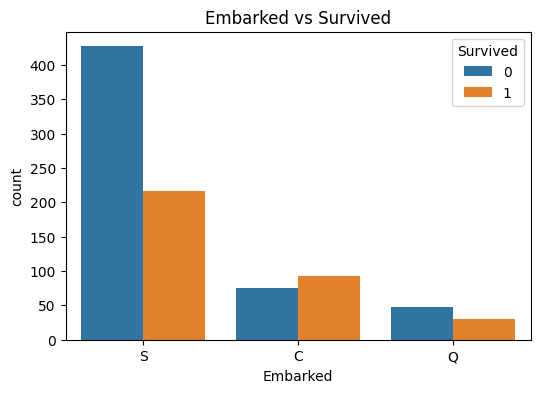

In [7]:
# 1 Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт.
# Попробуйте использовать другие инструменты визуализации.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка Titanic
df = pd.read_csv("titanic.csv")

# Выведем первые строки и информацию о типах
print(df.head())
print(df.info())

# Упростим до ключевых признаков (категориальных и целевой)
cat_features = ['Pclass', 'Sex', 'Embarked']
target = 'Survived'

# Визуализация распределения категориальных признаков
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Распределение признака {col}')
    plt.show()

# Визуализация совместного распределения признаков и целевой переменной
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f'{col} vs {target}')
    plt.legend(title='Survived', loc='upper right')
    plt.show()


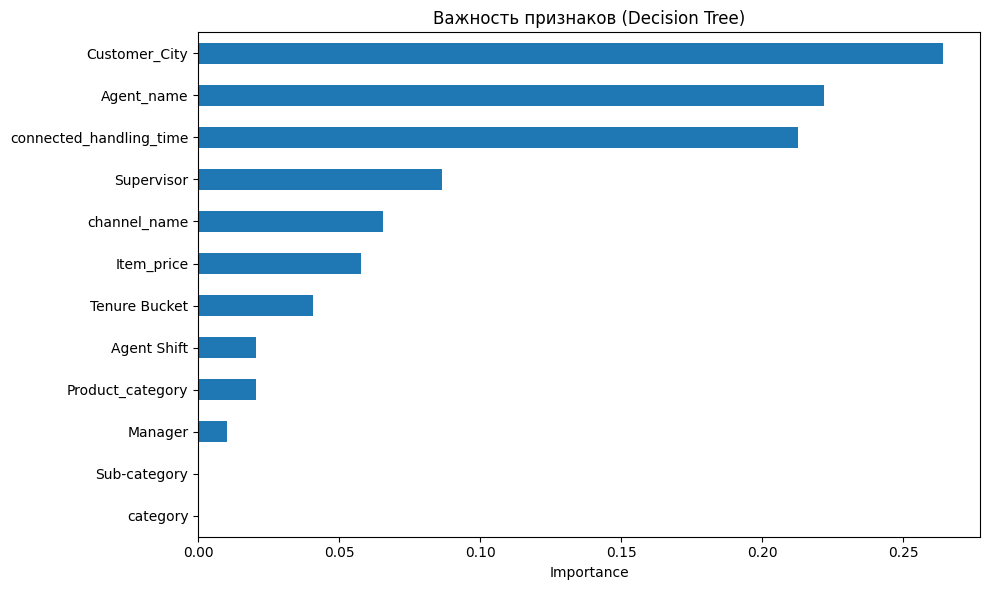

In [14]:
# 2 Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков.
# Сделайте вывод об адекватности наших предположений.

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Загрузка
df_cs = pd.read_csv("Customer_support_data.csv")

# Выберем только те столбцы, которые релевантны и не являются идентификаторами или метками времени
drop_cols = [
    'Unique id', 'Order_id', 'order_date_time', 'Issue_reported at',
    'issue_responded', 'Survey_response_Date', 'Customer Remarks'
]

df_cs = df_cs.drop(columns=drop_cols, errors='ignore')

# Целевая переменная
target_col = 'CSAT Score'
if target_col not in df_cs.columns:
    raise ValueError(f"Столбец '{target_col}' не найден в датасете!")

# Удалим строки с пустым значением CSAT Score
df_cs = df_cs.dropna(subset=[target_col])

# Преобразуем категориальные признаки
df_encoded = df_cs.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Удалим строки с пропущенными значениями
df_encoded = df_encoded.dropna()

# Разделим данные
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

# Обучение модели
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Важность признаков
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Важность признаков (Decision Tree)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()



In [15]:
# 3 Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки.
# Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузка
df = pd.read_csv("Customer_support_data.csv")

# Удаление лишнего
df = df.drop(columns=[
    'Unique id', 'Order_id', 'order_date_time', 'Issue_reported at',
    'issue_responded', 'Survey_response_Date', 'Customer Remarks'
], errors='ignore')

# Целевая переменная
target_col = 'CSAT Score'
df = df.dropna(subset=[target_col])

# Кодирование категориальных признаков
df_clean = df.copy()
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

df_clean = df_clean.dropna()

# Разделение
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Модель
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Точность модели на тестовой выборке:", accuracy_score(y_test, y_pred))


Точность модели на тестовой выборке: 0.5238095238095238


In [29]:
# 4 Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка данных
df = pd.read_csv("titanic.csv")

# Удалим лишние колонки
df = df.drop(['Unnamed: 0', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Удалим строки с пропусками
df = df.dropna()

# Переведем Pclass из 'first', 'second', 'third' в числа
df['Pclass'] = df['Pclass'].map({'first': 1, 'second': 2, 'third': 3})

# Кодируем строковые признаки
for col in ['Sex', 'Embarked']:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Разделение на X и y
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Результаты
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))
print("\nОтчет:\n", classification_report(y_test, y_pred))


Матрица ошибок:
 [[80 19]
 [22 57]]

Отчет:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80        99
           1       0.75      0.72      0.74        79

    accuracy                           0.77       178
   macro avg       0.77      0.76      0.77       178
weighted avg       0.77      0.77      0.77       178



In [30]:
# 5 Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели.
# Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Подготовка тех же данных
df = pd.read_csv("titanic.csv")
df = df.drop(['Unnamed: 0', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = df.dropna()

df['Pclass'] = df['Pclass'].map({'first': 1, 'second': 2, 'third': 3})

# Целевая переменная
y = df['Survived']
X = df.drop('Survived', axis=1)

# Категориальные колонки
cat_cols = ['Sex', 'Embarked']

# Преобразователь
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

# Обработка
X_processed = preprocessor.fit_transform(X)

# Разделение
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=42)

# Обучение модели
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Точность после OneHotEncoding:", accuracy_score(y_test, y_pred))



Точность после OneHotEncoding: 0.7303370786516854


In [31]:
# 6 Создайте воспроизводимый код обработки данного датасета.
def preprocess_titanic(df):
    df = df.drop(['Unnamed: 0', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    df = df.dropna()
    df['Pclass'] = df['Pclass'].map({'first': 1, 'second': 2, 'third': 3})

    for col in ['Sex', 'Embarked']:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    return df

# Использование
df_raw = pd.read_csv("titanic.csv")
df_clean = preprocess_titanic(df_raw)

X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.7696629213483146
